In [82]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [83]:
conda install graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Examining conflict for toolz anaconda appdirs ipywidgets pytz python.app alaba-\ ^C
                                                                               failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


https://www.datacamp.com/tutorial/decision-tree-classification-python

In [48]:
df=pd.read_csv("/Users/user/Documents/M.Tech Data Science-BITS Pilani/Second Semester/Machine Learning/Assignment/Steel_industry_data.csv")
df = pd.DataFrame(data=df)


In [40]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


## Creating a col Shift from date col

In [49]:
df["Shift"]=df['date'].apply(lambda x : "Day" if pd.to_datetime(str(x)).time().hour >=7 and pd.to_datetime(str(x)).time().hour < 19 else "Night" )
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Shift
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,Night
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,Night
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,Night
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,Night
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,Night


## Feature Selection

## Creating Dummy variables

In [50]:
cat_variables=['WeekStatus', 'Day_of_week','Shift']

In [51]:
df = pd.get_dummies(df, columns=['WeekStatus', 'Day_of_week', 'Shift'],drop_first=True)
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Shift_Night
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Light_Load,0,1,0,0,0,0,0,1
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Light_Load,0,1,0,0,0,0,0,1
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Light_Load,0,1,0,0,0,0,0,1
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Light_Load,0,1,0,0,0,0,0,1
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Light_Load,0,1,0,0,0,0,0,1


## Feature Selection

In [52]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Load_Type', 'WeekStatus_Weekend', 'Day_of_week_Monday',
       'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday',
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Shift_Night'],
      dtype='object')

In [62]:
#split dataset in features and target variable
feature_cols = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
        'WeekStatus_Weekend', 'Day_of_week_Monday',
       'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday',
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Shift_Night']
X = df[feature_cols] # Features
y = df.Load_Type # Target variable

## Splitting the data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [64]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

## Building decision tree

In [65]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating the model

In [66]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8913622526636226


## Visualizing the Decision Tree

In [67]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Load_Type.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [68]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Load_Type") 

ModuleNotFoundError: No module named 'graphviz'

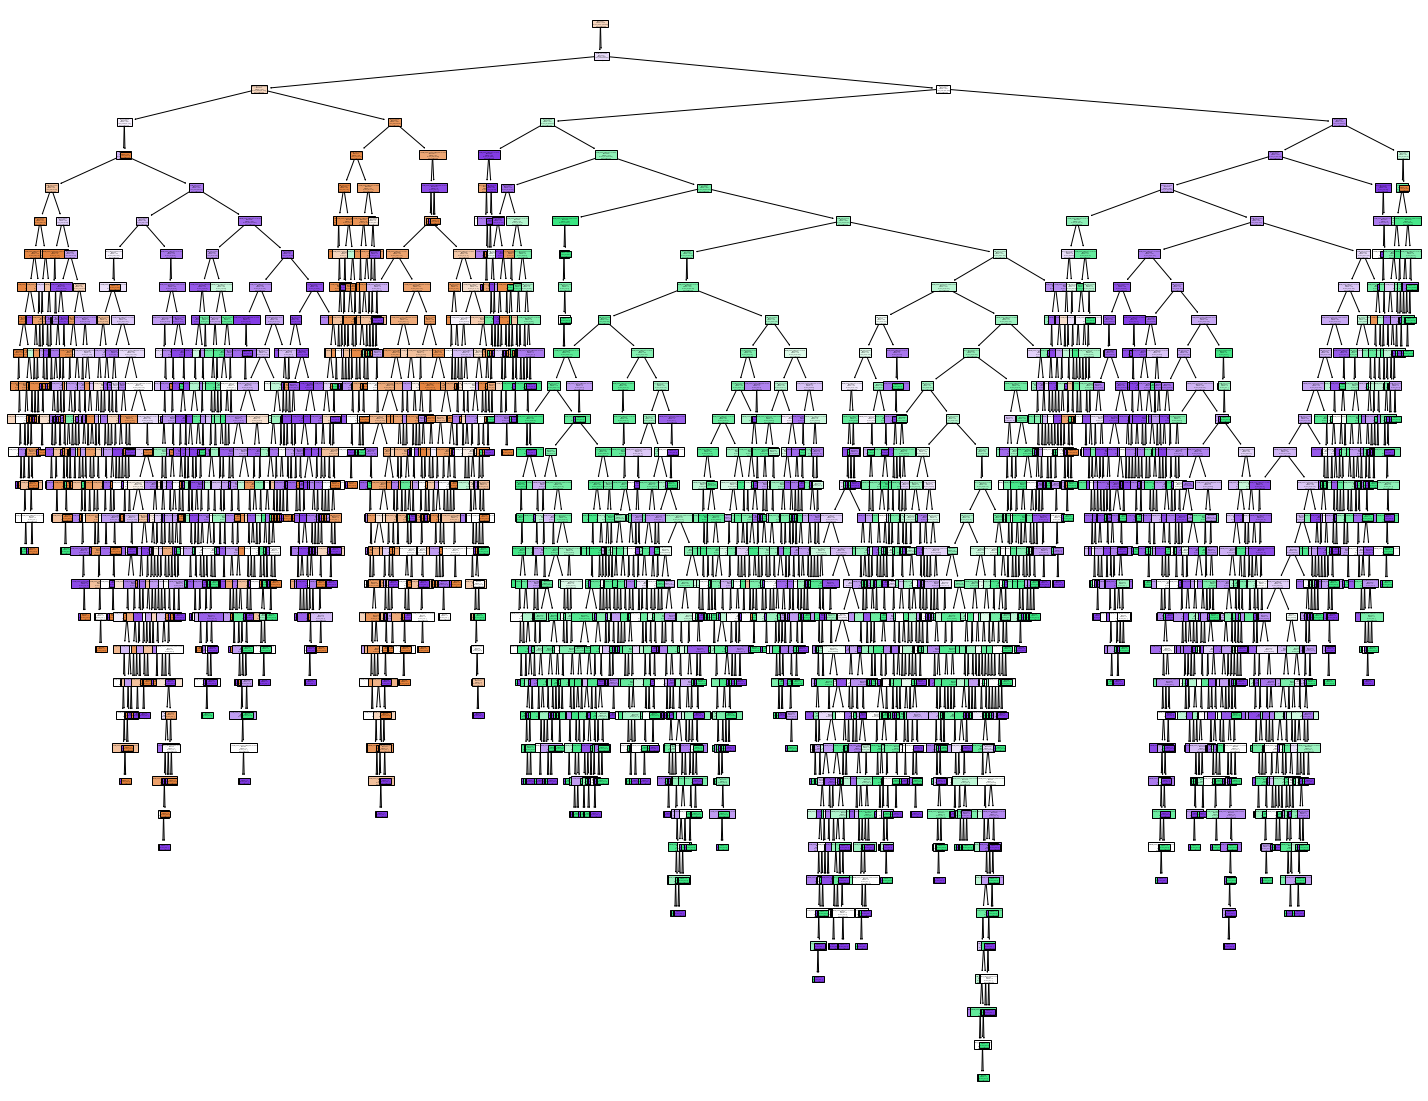

In [80]:
fig = plt.figure(figsize=(25,20))
_ =tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=df.Load_Type,
                   filled=True)

In [71]:
tree.plot_tree(clf) 
plt.savefig('DT.pdf')

NameError: name 'tree' is not defined

## Optimizing Decision tree performance

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## Visualizing the Decision Tree

In [28]:
from six import StringIO from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Usage.png')
Image(graph.create_png())

SyntaxError: invalid syntax (3126502934.py, line 1)